# NLP

In [1]:
######################################################Initial Packages########################################################
#Basic Operating System Stuff
import sklearn
import os
import gc #garbage collector
import random #random seed generator
import sys
import csv

#Basic NLP toolkit stuff
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize  
import re
import spacy
from spacymoji import Emoji
import pickle

#Basic dataframe, array, and math stuff
import pandas as pd #data frame
import math #math functions
import numpy as np    #numerical package

#Tensorflow
import tensorflow as tf #backend for keras
from tensorflow.python.client import device_lib #to  see if my GPU is alive!
import tensorflow.keras #keras
from tensorflow.keras import Sequential,Input,Model #pull in the sequential, input layers and a model
from tensorflow.keras import layers #If I were building a sequential model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Embedding, Bidirectional, Dense, LSTM, Concatenate #pull in the dense, dropout, and flatten layers
from tensorflow.keras.layers import Input, Add, Activation, ZeroPadding2D, MaxPooling2D, BatchNormalization 
from tensorflow.keras.layers import LeakyReLU #pull in leakly relu layer
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau #use for early stopping and reduction on level-out
from tensorflow.keras.models import Model, load_model  #Can't do much without a model
from tensorflow.keras import utils #Need utilities for the layers
from tensorflow.keras.utils import get_file #To load certain files
from tensorflow.keras.utils import plot_model #Allows plotting of the model
import tensorflow.keras.backend as K #let's write our own metrics and loss functions
from tensorflow.keras import backend
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


#Graphing
import pydot  #For model plotting
from IPython.display import SVG #Same here
import matplotlib.pyplot as plt #plotting
import matplotlib #image save
from matplotlib.pyplot import imshow #Show images
from IPython.display import display
from sklearn.model_selection import train_test_split as tts

#Directory

os.chdir("D:/Human_Trafficking")

%matplotlib inline

#Verify GPU recognition
print(device_lib.list_local_devices()) #Let's see if Python recognizes my GPU, shall we?
##############################################################################################################################

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13651674083554307793
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 1260251094050060481
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6918604064
locality {
  bus_id: 1
  links {
  }
}
incarnation: 746287571822531521
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2080 Super, pci bus id: 0000:01:00.0, compute capability: 7.5"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 7203669538176049506
physical_device_desc: "device: XLA_GPU device"
]


## Functions to Reset Keras to Save Memory and to Assign Values to the CPU, Load the Image File Names and Save the Dimension

In [2]:
#################################################Memory Mgt / Directory Load###################################################
def reset_keras():
    tf.keras.backend.clear_session #This clears the GPU session
    gc.collect()
reset_keras()            
################################################################################################################################

# Read Data 

In [3]:
mydf = pd.read_csv('data.csv', encoding="utf8")
mydf.head()

,id,label,title,body
0,2632347,4,Ms Chrissy - 22,Tall <br> Sexy<br> Slim<br> 100% real<br> Reas...
1,11645643,1,Everybody loves a Filipina Girl - 29,Hi there Boys it's Miss Sweet 1OO% Filipina gi...
2,15199346,4,NEW Sexy Asian girl⛔️⛔️⛔️⛔️⛔️SUPER HOOOT⛔️⛔️⛔️...,Hello Gentlemen⚜⚜<br> I am Mimi Asian Girl <br...
3,14477454,0,Freaky . TS 🍆🍑 TOP AND BOTTOM (9INCH) fun pack...,• So Treat Yourself to Heaven on Earth...🌍 YOU...
4,11266475,2,❤Kinky Kaylani👑Rear Access &VIP visits👑Great R...,Aren't you tired of the old bait and switch or...


# Load Emoji Handling Package

In [4]:
spacy.prefer_gpu() #use the GPU if available
nlp = spacy.load("en_core_web_lg") #load the large version of the emojis
emoji = Emoji(nlp) 
nlp.add_pipe("emoji", first=True) #add emoji pipeline
nlp.pipe_names

['emoji',
 'tok2vec',
 'tagger',
 'parser',
 'attribute_ruler',
 'lemmatizer',
 'ner']

# Look at the Emoji's

In [5]:
tmp=mydf.values

def extract_emojies(x): #define function
  tmp = nlp(str(x['title'])) #with emojis
  emojis = [token.text for token in tmp if token._.is_emoji] #get the emoji tokens
  return emojis
emojies_df = mydf.apply(extract_emojies, axis=1) #look at the emojis in the title only (quicker)
print(emojies_df)

del tmp
reset_keras()

0                                                []
1                                                []
2        [⛔, ⛔, ⛔, ⛔, ⛔, ⛔, ⛔, ⛔, ⛔, ⛔, ⛔, ⛔, ⛔, ⛔]
3                                      [🍆, 🍑, 🎉, 🎊]
4                                   [❤, 👑, 👑, ❤, ❤]
                            ...                    
12345                                            []
12346                [📒, 📒, 📒, 📒, 📒, 📒, 📒, 📒, 📒, 📒]
12347                [💝, 👑, 👑, 👑, 💎, 💎, 💎, 👑, 👑, 👑]
12348                                           [☎]
12349       [💘, 💘, 💘, 💘, 🌹, 🌹, 🌹, 🌹, 🌹, 🌹, 🌹, 🌹, 🌹]
Length: 12350, dtype: object


In [6]:
tmp=mydf.values
def extract_emojies(x): #define function
  tmp = nlp(str(x['body'])) #with emojis
  emojies1 = [token.text for token in tmp if token._.is_emoji] #get the emoji tokens
  return emojies1
emojies1_df = mydf.apply(extract_emojies, axis=1) #look at the emojis in the title only (quicker)
print(emojies1_df)
del tmp
reset_keras()

0                                                    []
1                                                    []
2        [⚜, ⚜, 💋, 💋, 💋, 💋, ☎️, 🌹, 🌹, 🌹, 🌹, 🌹, 🌹, 🌹, 🌹]
3                              [🌍, 👉, 👉, 👉, 👉, 👉, 🍃, 🙌]
4                                                    []
                              ...                      
12345                                                []
12346                                                []
12347                                                []
12348                                               [➡]
12349                                                []
Length: 12350, dtype: object


In [7]:
print(mydf.dtypes)
print(mydf.shape)

id        int64
label     int64
title    object
body     object
dtype: object
(12350, 4)


# Count the Emojis / Special Words

In [8]:
emcount1=[] #counts
emcount2=[]
pcount1=[] #proportions
pcount2=[]
sexcount1=[] #counts for derivatives of sex
sexcount2=[]
psexcount1=[] #proportions for derivatives of sex
psexcount2=[]

for i in range(len(mydf)):
    l1=len(str(mydf.iloc[i,2]))
    l2=len(str(mydf.iloc[i,3]))
    st1=str(mydf.iloc[i,2])
    st2=str(mydf.iloc[i,3])
    tmp1=nlp(st1)
    tmp2=nlp(st2)
    emcount1.append(len(tmp1))
    emcount2.append(len(tmp2))
    pcount1.append(len(tmp1)/(l1+.1))
    pcount2.append(len(tmp2)/(l2+.1))
    tmp3=len(re.findall(r's\s*e\s*x\s*',st1, re.IGNORECASE)) #find the word sex with or without spaces
    tmp4=len(re.findall(r's\s*e\s*x\s*',st2, re.IGNORECASE)) #same here
    sexcount1.append(tmp3)
    sexcount2.append(tmp4)
    psexcount1.append(tmp3/(l1+.1))
    psexcount2.append(tmp4/(l2+.1))                 

    
mydf['num_title_emojis']=emcount1 #add to dataframe
mydf['num_body_emojis']=emcount2
mydf['num_title_sex']=sexcount1
mydf['num_body_sex']=sexcount2

mydf['prop_title_emojis']=pcount1
mydf['prop_body_emojis']=pcount2
mydf['prop_title_sex']=psexcount1
mydf['prop_body_sex']=psexcount2

mydf.to_csv('D:/Human_Trafficking/expanded.csv', index=False)
reset_keras()

In [9]:
mydf.head()

,id,label,title,body,num_title_emojis,num_body_emojis,num_title_sex,num_body_sex,prop_title_emojis,prop_body_emojis,prop_title_sex,prop_body_sex
0,2632347,4,Ms Chrissy - 22,Tall <br> Sexy<br> Slim<br> 100% real<br> Reas...,4,64,0,1,0.264901,0.333160,0.000000,0.005206
1,11645643,1,Everybody loves a Filipina Girl - 29,Hi there Boys it's Miss Sweet 1OO% Filipina gi...,7,96,0,0,0.193906,0.244836,0.000000,0.000000
2,15199346,4,NEW Sexy Asian girl⛔️⛔️⛔️⛔️⛔️SUPER HOOOT⛔️⛔️⛔️...,Hello Gentlemen⚜⚜<br> I am Mimi Asian Girl <br...,37,124,1,1,0.410655,0.286971,0.011099,0.002314
3,14477454,0,Freaky . TS 🍆🍑 TOP AND BOTTOM (9INCH) fun pack...,• So Treat Yourself to Heaven on Earth...🌍 YOU...,18,63,0,0,0.299501,0.302739,0.000000,0.000000
4,11266475,2,❤Kinky Kaylani👑Rear Access &VIP visits👑Great R...,Aren't you tired of the old bait and switch or...,21,116,0,0,0.233074,0.236686,0.000000,0.000000


# Plot the Relative Frequency Distribution

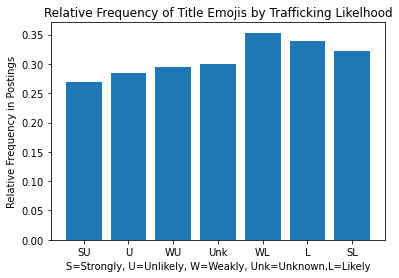

In [10]:
tmp4=mydf.groupby('label')['prop_title_emojis'].mean()
myseq=['SU','U','WU','Unk','WL','L', 'SL']
plt.bar(myseq,tmp4)
plt.title('Relative Frequency of Title Emojis by Trafficking Likelhood')
plt.xlabel('S=Strongly, U=Unlikely, W=Weakly, Unk=Unknown,L=Likely')
plt.ylabel('Relative Frequency in Postings')

del tmp4

reset_keras()

# Recode Emojis / Emoticons to Text, Remove Stopwords / Punctuation, Convert to Lower Case / Remove Numbers

In [11]:
import nltk
import string
from num2words import num2words
from string import punctuation
from emot.emo_unicode import UNICODE_EMOJI 
from emot.emo_unicode import EMOTICONS_EMO # For EMOTICONS
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from bs4 import BeautifulSoup
#nltk.download('wordnet')
#nltk.download('averaged_perceptron_tagger')

#nltk.download('stopwords')
#nltk.download('punkt')
lemmatizer = WordNetLemmatizer()
stopwords = set(nltk.corpus.stopwords.words('english'))
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}

def clean_html(text):
  CLEANR = re.compile('<.*?>') 
  text = re.sub(CLEANR, '', text)
  return text

def convert_emoticons(text):
    for emot in EMOTICONS_EMO:
        text = text.replace(emot, EMOTICONS_EMO[emot]+" ".replace("",""))
    return text

def convert_emojis(text):
    for emot in UNICODE_EMOJI:
        text = text.replace(emot,UNICODE_EMOJI[emot]+" ".replace("",""))
    return text

def remove_stopwords(text):
    return [word for word in word_tokenize(text) if not word in stopwords]

def strip_punctuation(text):
    return ''.join(c for c in text if c not in punctuation)+' '    

def to_number(text):    
    return(re.sub(r"(\d+)", lambda x: num2words(int(x.group(0))), text))

def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return ' '.join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

In [12]:
mydf['title']=mydf['title'].str.lower()
mydf['title']=mydf['title'].astype(str).apply(clean_html)
mydf['title']=mydf['title'].astype(str).apply(convert_emoticons)
mydf['title']=mydf['title'].astype(str).apply(convert_emojis)
mydf['title']=mydf['title'].astype(str).apply(remove_stopwords)
mydf['title']=mydf['title'].astype(str).apply(strip_punctuation)
mydf['title']=mydf['title'].astype(str).apply(to_number)
mydf['title']=mydf['title'].astype(str).apply(lemmatize_words)

mydf['body']=mydf['body'].str.lower()
mydf['body']=mydf['body'].astype(str).apply(clean_html)
mydf['body']=mydf['body'].astype(str).apply(convert_emoticons)
mydf['body']=mydf['body'].astype(str).apply(convert_emojis)
mydf['body']=mydf['body'].astype(str).apply(remove_stopwords)
mydf['body']=mydf['body'].astype(str).apply(strip_punctuation)
mydf['body']=mydf['body'].astype(str).apply(to_number)
mydf['body']=mydf['body'].astype(str).apply(lemmatize_words)
mydf

,id,label,title,body,num_title_emojis,num_body_emojis,num_title_sex,num_body_sex,prop_title_emojis,prop_body_emojis,prop_title_sex,prop_body_sex
0,2632347,4,ms chrissy twenty-two,tall sexy slim one hundred real reasonable cle...,4,64,0,1,0.264901,0.333160,0.000000,0.005206
1,11645643,1,everybody love filipina girl twenty-nine,hi boys s miss sweet oneoo filipina girl kai l...,7,96,0,0,0.193906,0.244836,0.000000,0.000000
2,15199346,4,new sexy asian girl noentry ️ noentry ️ noentr...,hello gentleman fleurdelis fleurdelis mimi asi...,37,124,1,1,0.410655,0.286971,0.011099,0.002314
3,14477454,0,freaky t eggplant peach top bottom nineinch fu...,• treat heaven earth globeshowingEuropeAfrica ...,18,63,0,0,0.299501,0.302739,0.000000,0.000000
4,11266475,2,redheart kinky kaylani crown rear access vip v...,nt tired old bait switch picture tenyr old twe...,21,116,0,0,0.233074,0.236686,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
12345,11119322,5,houston outcall beautiful asian girl julie twe...,hello gentleman name julie twenty-three year o...,18,93,0,1,0.204313,0.242756,0.000000,0.002610
12346,5727617,1,stag party stripper two hundred and fiftyhr tw...,call toll free one visit angel eyez seven webs...,26,73,0,0,0.291807,0.089670,0.000000,0.000000
12347,8395124,5,heartwithribbon asian girl jane crown crown cr...,hey guy name jane wellreviewed openminded hot ...,21,98,1,0,0.308370,0.242514,0.014684,0.000000
12348,1549586,5,new ★ massage best sensual adult health offer ...,enjoy new moonlight spa nt hesitate experience...,20,128,0,0,0.195886,0.212237,0.000000,0.000000


# Write to CSV

In [13]:
mydf.to_csv('D:/Human_Trafficking/ht.csv', index=False)


# Reload Data

In [14]:
mydf=pd.read_csv('D:/Human_Trafficking/ht.csv')
mydict={0:0, 1:0, 2:0, 3:0, 4:1, 5:1, 6:1}
mydf['label']=mydf['label'].replace(dict(mydict))
np.bincount(mydf['label'].values)

array([8296, 4054], dtype=int64)

# Train Test Split

In [15]:
x_train, x_test, y_train, y_test = tts(mydf.iloc[:,2:11], mydf['label'], test_size=0.2, random_state=42)#title
x_train=x_train.append(x_train[y_train==1]) #shortcut..replace with mydf.sample(frac=1.0, replace=True, random_state=1)
y_train=y_train.append(y_train[y_train==1])
np.bincount(y_train)

array([6638, 6484], dtype=int64)

# Make Data Sets

In [16]:
x_train1=x_train['title']
x_train2=x_train['body']
x_test1=x_test['title']
x_test2=x_test['body']

# Min Max Scale for Continuous Variables

In [17]:
from sklearn.preprocessing import MinMaxScaler as mms
transform=mms()

x_train.iloc[:,2:8]=transform.fit_transform(x_train.iloc[:,2:8])
x_test.iloc[:,2:8]=transform.transform(x_test.iloc[:,2:8])

x_train.head()

,title,body,num_title_emojis,num_body_emojis,num_title_sex,num_body_sex,prop_title_emojis,prop_body_emojis,prop_title_sex
10132,dashingaway dashingaway dashingaway k dashinga...,take sexiness seduction whole different level ...,0.382716,0.044490,0.25,0.04,0.674728,0.271144,0.009891
4484,jessica hibiscus springfield va twenty-nine,im im bestbout idont use fake picturei like cl...,0.030864,0.020176,0.00,0.00,0.187533,0.233381,0.000000
11620,special let make deal kissingfacewithsmilingey...,gemstone sparkle im destiny always clean respe...,0.080247,0.040352,0.00,0.02,0.266738,0.259366,0.000000
3328,vip blonde bombshell redheart ️ kissmark redhe...,name mekenzie tire get ask call one hundred fr...,0.135802,0.046560,0.00,0.00,0.299760,0.265535,0.000000
3115,redcircle redheart moneybag ⎛⎝do nt escort see...,currently seek aspire experienced dancer adult...,0.166667,0.195034,0.25,0.02,0.263944,0.208467,0.009699


# Tokenize Training Data

In [18]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

num_words = 50000
oov_token = '<UNK>'
pad_type = 'post'
trunc_type = 'post'

tokenizer = Tokenizer(num_words=num_words, oov_token=oov_token)

tokenizer.fit_on_texts(x_train1.astype('str'))
tokenizer.fit_on_texts(x_train2.astype('str'))

# Encode training data sentences into sequences
train_sequences1 = tokenizer.texts_to_sequences(x_train1.astype('str'))
train_sequences2 = tokenizer.texts_to_sequences(x_train2.astype('str'))

# Get max training sequence length
maxlen1 = max([len(x) for x in train_sequences1])
maxlen2 = max([len(x) for x in train_sequences2])

# Pad the training sequences
xtrain_1 = pad_sequences(train_sequences1, padding=pad_type, truncating=trunc_type, maxlen=maxlen1)
xtrain_2 = pad_sequences(train_sequences2, padding=pad_type, truncating=trunc_type, maxlen=maxlen2)

xtrain_3=x_train.iloc[:,2:8].values

print(xtrain_1.shape, xtrain_2.shape, xtrain_3.shape)


(13122, 131) (13122, 612) (13122, 6)


# Tokenize Test Data

In [19]:
test_sequences1 = tokenizer.texts_to_sequences(x_test1.astype('str'))
test_sequences2 = tokenizer.texts_to_sequences(x_test2.astype('str'))
xtest_1 = pad_sequences(test_sequences1, padding=pad_type, truncating=trunc_type, maxlen=maxlen1)
xtest_2 = pad_sequences(test_sequences2, padding=pad_type, truncating=trunc_type, maxlen=maxlen2)
xtest_3 = x_test.iloc[:,2:8].values

print(xtest_1.shape, xtest_2.shape, xtest_3.shape)


(2470, 131) (2470, 612) (2470, 6)


# Multi-Input Model

In [27]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Dense, LSTM, Bidirectional, Concatenate

input_1 = Input(shape=(xtest_1.shape[1],))
input_2 = Input(shape=(xtest_2.shape[1],))
input_3 = Input(shape=6,)

p1=Embedding(len(tokenizer.word_index) + 1, 512)(input_1)
p2=Bidirectional(LSTM(256, return_sequences=True, dropout=.5))(p1)
p3=Bidirectional(LSTM(256, return_sequences=False, dropout=.2))(p2)

q1=Embedding(len(tokenizer.word_index) + 1, 512)(input_2)
q2=Bidirectional(LSTM(256, return_sequences=True, dropout=.5))(q1)
q3=Bidirectional(LSTM(256, return_sequences=False, dropout=.2))(q2)

r1=Dense(64)(input_3)

concat=Concatenate()([p3,q3,r1])
dense=Dense(64, activation='relu')(concat)
output=Dense(1, activation='sigmoid')(dense)
model=Model(inputs=[input_1, input_2, input_3], outputs=output)
model.compile(optimizer='adamax', loss='binary_crossentropy', metrics=['binary_accuracy'])
model.summary()

Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 131)]        0                                            
__________________________________________________________________________________________________
input_11 (InputLayer)           [(None, 612)]        0                                            
__________________________________________________________________________________________________
embedding_6 (Embedding)         (None, 131, 512)     15395328    input_10[0][0]                   
__________________________________________________________________________________________________
embedding_7 (Embedding)         (None, 612, 512)     15395328    input_11[0][0]                   
_______________________________________________________________________________________

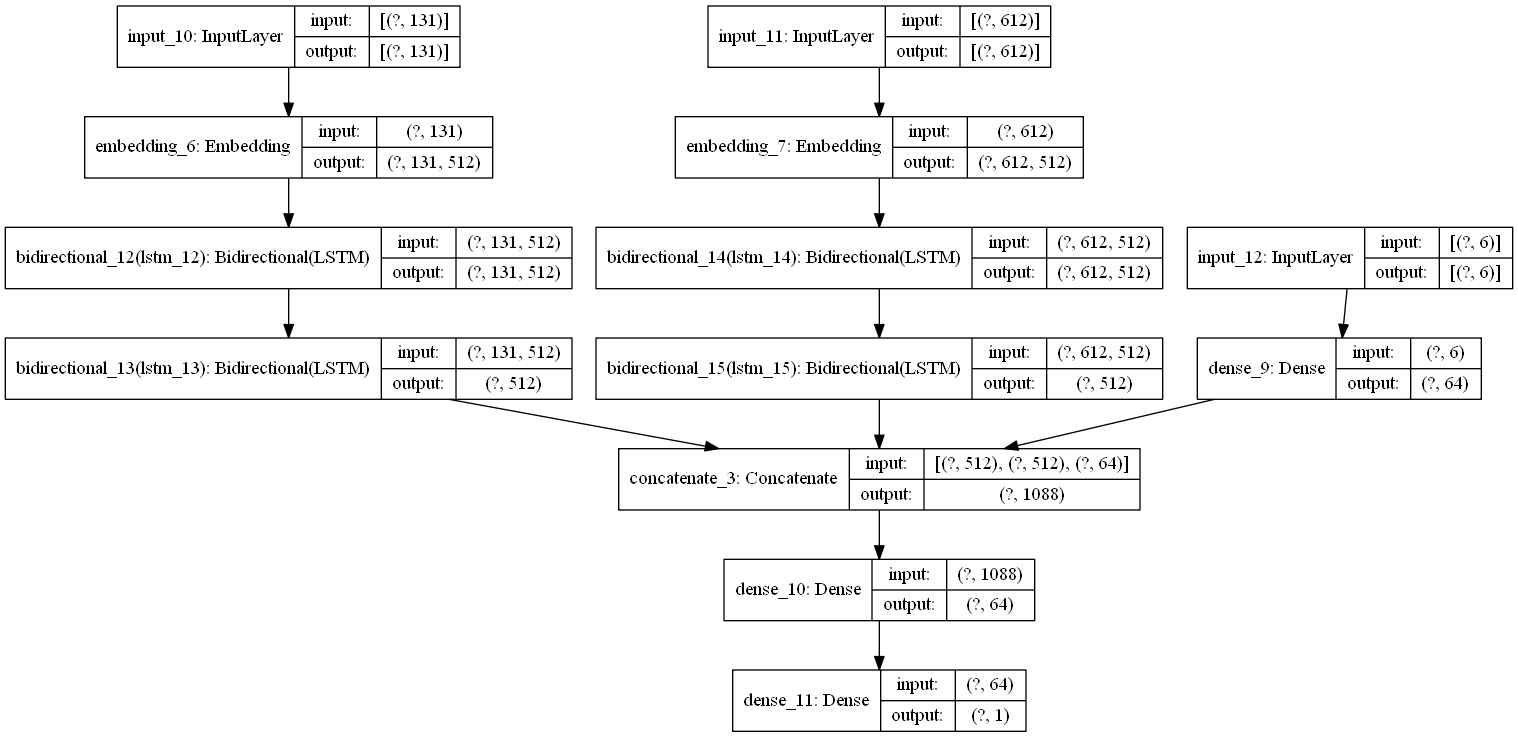

In [28]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot3.png', show_shapes=True, show_layer_names=True)

In [29]:
from tensorflow.keras.callbacks import ModelCheckpoint 
random.seed(1234)
reset_keras()
checkpoint = ModelCheckpoint("best_model.hdf5", monitor='binary_accuracy', verbose=2,
    save_best_only=True, mode='auto')
history=model.fit(x=[xtrain_1,xtrain_2,xtrain_3],y=y_train,
                  batch_size=32,verbose=1,validation_split=.2, epochs=5, callbacks=[checkpoint])

Epoch 1/5
329/329 [==============================] - ETA: 0s - loss: 0.4989 - binary_accuracy: 0.7613
Epoch 00001: binary_accuracy improved from -inf to 0.76127, saving model to best_model.hdf5
329/329 [==============================] - 120s 364ms/step - loss: 0.4989 - binary_accuracy: 0.7613 - val_loss: 0.6318 - val_binary_accuracy: 0.6004
Epoch 2/5
329/329 [==============================] - ETA: 0s - loss: 0.3958 - binary_accuracy: 0.8210
Epoch 00002: binary_accuracy improved from 0.76127 to 0.82100, saving model to best_model.hdf5
329/329 [==============================] - 121s 368ms/step - loss: 0.3958 - binary_accuracy: 0.8210 - val_loss: 0.4840 - val_binary_accuracy: 0.7406
Epoch 3/5
329/329 [==============================] - ETA: 0s - loss: 0.3480 - binary_accuracy: 0.8490
Epoch 00003: binary_accuracy improved from 0.82100 to 0.84900, saving model to best_model.hdf5
329/329 [==============================] - 121s 367ms/step - loss: 0.3480 - binary_accuracy: 0.8490 - val_loss: 0.

# Evaluate on Test Set

In [30]:
from sklearn.metrics import classification_report as cr
score=model.evaluate([xtest_1,xtest_2,xtest_3], y=y_test)


78/78 [==============================] - 7s 92ms/step - loss: 0.5199 - binary_accuracy: 0.7850


# Predict on Test Set

In [50]:
predict=model.predict([xtest_1,xtest_2,xtest_3])
predict1=np.squeeze(predict)
predict1=np.round(predict,0)

# Generate Metrics

In [51]:
from sklearn.metrics import classification_report as cr
print(cr(y_test, predict1))

              precision    recall  f1-score   support

           0       0.87      0.81      0.83      1658
           1       0.65      0.74      0.69       812

    accuracy                           0.79      2470
   macro avg       0.76      0.77      0.76      2470
weighted avg       0.79      0.79      0.79      2470



In [73]:
a=np.array([y_test,np.squeeze(predict)]).T
a=pd.DataFrame(a, columns=['True','Predicted'])
means =a.groupby('True').mean()

sub=a[a['Predicted']>.99]
sub.mean()

True         0.965116
Predicted    0.993624
dtype: float64

# Plot Accuracy

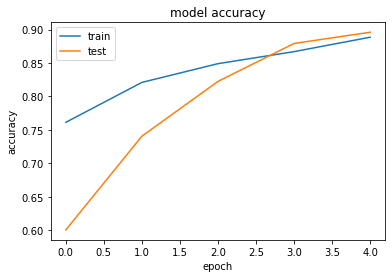

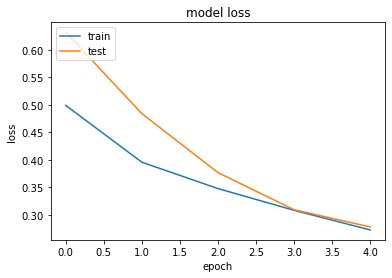

In [38]:
import matplotlib.pyplot as plt

plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()